### To Carried out Feature extraction operation as Word counts, Characters count, Average characters per word, Stop words count, Count #HashTags and @Mentions, Upper case word count,

### Data processing operation, and built a basic machine learning model for binary sentiment classification from twitter data labelled with positive and negative tweets

### Notebook also contain some advanced text processing and feature extraction operation

### Choosing the best machine learning models for text classification

## Step 1 :  Loading file, cleaning data and labelling target variables

In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy #can say its a numpy for natural language processing
from spacy.lang.en.stop_words import STOP_WORDS #most common words in a language

#### Spacy - 
a free, open-source library for Natural Language Processing in Python. It's written in Cython and is designed to build information extraction or natural language understanding systems.

#### Features of spacy
Non-destructive tokenization, Named entity recognition, Support for 59+ languages, 46 statistical models for 16 languages, Pretrained word vectors, State-of-the-art speed, Easy deep learning integration, Part-of-speech tagging, Labelled dependency parsing, Syntax-driven sentence segmentation, Built in visualizers for syntax and NER, Convenient string-to-hash mapping, Export to numpy data arrays, Efficient binary serialization, Easy model packaging and deployment, Robust, rigorously evaluated accuracy

#### Dataset : https://www.kaggle.com/kazanova/sentiment140

In [4]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'latin1', header = None)# latin1 to take on error as UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 80-81: invalid continuation byte

In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df = df[[5,0]] # we only need 0th column which is our target or response variable and 5th column(feature variable) for this project

In [8]:
df.columns = ['tweets', 'sentiment']
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

Here we have two classes under sentiment we gonna name them acc. to information provided with the dataset

In [10]:
target_mapping = {0: 'negative', 4: 'positive'}

## Step 2: Feature Extraction from the tweets

### Word Count in each Tweets

In [26]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split())) #str func is used to convert numerical value and count them too

In [27]:
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Total characters in each tweets

In [28]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))

In [29]:
df.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average word length

In [30]:
#Example
len('Hello! how are you?')/4

4.75

In [31]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # =!len(x)/len(words)

In [32]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x))

In [33]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### Stop words count
Those words which occurs frequently in the test data but context, syntactic meaning required, that's why sometimes this stop words are necessary

Have a look on stop words

In [34]:
print(STOP_WORDS) 

{'used', 'nevertheless', 'formerly', 'serious', 'he', 'us', 'mostly', 'you', 'why', 'go', 'at', 'sometime', 'if', 'with', 'they', 'while', "n't", 'wherein', '’ve', 'or', 'using', 'becomes', '’m', 'move', '’d', 'else', 'will', 'show', 'what', 'alone', 'such', 'that', 'be', 'whatever', 'was', 'amongst', 'many', 'off', 'put', 'sometimes', 'most', 'take', 'to', 'thru', 'same', 'twenty', 'beside', 'had', 'behind', 'six', 'can', 'under', 'there', 'than', 'along', 'here', 'wherever', 'her', 'before', 'then', 'beforehand', 'being', 'full', 'all', 'however', 'quite', 'even', 'everyone', 'somehow', 'we', 'those', 'during', 'though', 'hereby', 'him', 'my', 'three', 'herself', 'therein', 'but', 'besides', 'herein', 'front', 'almost', 'after', 'would', 'also', 'too', 'either', 'next', 'forty', 'already', 'so', 'mine', 'between', 'latterly', 'thereupon', "'d", 'this', 'see', 'amount', 'various', 're', 'a', 'became', 'for', 'now', '‘d', 'together', 'sixty', 'onto', 'your', 'become', 'everything', 'th

In [35]:
x = 'this is a great example'

In [36]:
x.split()

['this', 'is', 'a', 'great', 'example']

In [37]:
[t for t in x.split() if t in STOP_WORDS]

['this', 'is', 'a']

In [38]:
len([t for t in x.split() if t in STOP_WORDS])

3

Similarly we are going to count the stop words in each tweets

In [40]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [41]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### Count #Hashtags and @Mentions on the each tweets

In [42]:
x = 'this is #hastag and this is @mention'
# x = x.split()
# x

In [43]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [44]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [45]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


### To check if numerical digits are present in the Tweets

In [46]:
df['numeric_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [47]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


In [48]:
df.numeric_count.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  9,  8,  7, 13], dtype=int64)

we have lot of numerical data present in the tweets

### Upper case words count

In [49]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [50]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [56]:
df.upper_counts.unique()

array([ 1,  0,  3,  2,  5,  4,  6, 13,  8, 24,  7,  9, 22, 27, 20, 11, 10,
       14, 12, 16, 17, 21, 15, 18, 19, 25, 23, 28, 26, 29, 30, 31, 40],
      dtype=int64)

In [62]:
df.loc[2]['tweets']

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

## Step 3:  Preprocessing and Cleaning

### Lower case conversion of each tweets

In [63]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [64]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


### Contraction to Expansion 
Source : https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [70]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

Example

In [71]:
x = "i don't, can't tell, he'll be fine, i'd like to save this file"

In [72]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [73]:
cont_to_exp(x)

'i do not, cannot tell, he shall / he will be fine, i had / i would like to save this file'

Similarly we are going to expand the contract word found if any in the tweets

In [74]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: cont_to_exp(x))

Wall time: 1min 20s


In [75]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1


### Count and Remove emails
We need regular expression library for this

In [76]:
import re

Example: 

In [77]:
x = 'hi email me at email@gmail.com or anothe@gmail.com'

In [78]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', x)

['email@gmail.com', 'anothe@gmail.com']

Similarly

In [79]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', x))

In [80]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [81]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0


In [82]:
df[df['emails_count']>0]

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


### Removing emails from tweets

In [83]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','', x) #substitute

'hi email me at  or '

In [84]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','', x))

In [85]:
df[df['emails_count']>0]

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, is a good start. but i thin...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


### Count URLs and remove it

In [86]:
x = 'hi, wanna see project like this? visit https://github.com/shubhamraw'

In [87]:
re.findall(r'(https|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'github.com', '/shubhamraw')]

In [88]:
df['urls_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [89]:
re.sub(r'(https|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

'hi, wanna see project like this? visit '

In [90]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [91]:
df.loc[0]['tweets']

'@switchfoot  - awww, that has / that is a bummer.  you shoulda got david carr of third day to do it. ;d'

In [92]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that has / that is a bumm...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


### Remove retweets

In [93]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'RT', '', x))

### Special chars removal or punctuation removal

In [94]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [95]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that has that is a bummer ...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving ...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Remove multiple spaces `"hi      hello           "`

In [96]:
x= 'thanks    for     viewing     this and  '

In [97]:
" ".join(x.split())

'thanks for viewing this and'

In [98]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

### Remove HTML tags

In [99]:
from bs4 import BeautifulSoup # library for parsing HTML and XML documents

In [100]:
x = '<html><h2>Have a great day</h2></html>'

In [101]:
BeautifulSoup(x, 'lxml').get_text()

'Have a great day'

In [102]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

Wall time: 10min 16s


### Remove accented chars

In [103]:
import unicodedata

In [104]:
x = "Accented text: 'àéêöhello'"

In [105]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [106]:
remove_accented_chars(x)

"Accented text: 'aeeohello'"

### SpaCy and NLP

### Remove stop words

In [107]:
x = 'this is stop words removal code'

In [108]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [109]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [110]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Convert into base or root form of word it will take hrs or days

In [111]:
nlp = spacy.load('en_core_web_sm') # need to install this small data for spacy library, medium and large data files are also available

In [112]:
x = 'kenichan dived times ball managed save 50 rest'

In [113]:
# dive = dived, time=times, manage = managed

In [114]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma  = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [115]:
make_to_base(x)

kenichan dive times ball manage save 50 rest


### Common words removal

In [116]:
' '.join(df.head()['tweets'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [117]:
text = ' '.join(df['tweets'])

In [118]:
text = text.split()

In [119]:
freq_comm = pd.Series(text).value_counts()

In [120]:
f20 = freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
dtype: int64

In [121]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

### Rare words removal

In [122]:
rare20 = freq_comm[-20:]
rare20

kenakasoulstar    1
beatthegmat       1
partaaayy         1
benbiputra        1
cornerwoo         1
mrsmoca           1
tomgaroo          1
mitseufz          1
failbot           1
damnfinally       1
carme             1
gendegrassi       1
kathrynshea       1
heeeell           1
princessmisa      1
kudos2your        1
night---also      1
horrible-i        1
enterteinment     1
shakened          1
dtype: int64

In [123]:
rare = freq_comm[freq_comm.values ==1]
rare

goodnighttook                                          1
poteet                                                 1
mostlikely                                             1
ffxscarfacexsoundtrack2greatnessxcultureshockmagcom    1
quessir                                                1
                                                      ..
kudos2your                                             1
night---also                                           1
horrible-i                                             1
enterteinment                                          1
shakened                                               1
Length: 535876, dtype: int64

In [124]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [125]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Word cloud visualization

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
x = ' '.join(text[:20000])

In [128]:
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok leslie mad meh lover exception track g

In [129]:
len(text)

10887961

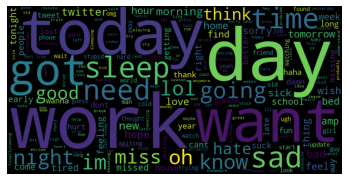

In [130]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling correction

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. A good thing about TextBlob is that they are just like python strings.

In [131]:
from textblob import TextBlob

In [137]:
x = "lat see how thes wrok whaty hwo wher"

In [138]:
x = TextBlob(x).correct()
x

TextBlob("at see how the work what who her")

### Tokenization

In [141]:
x = 'is this sentence going to tokenize?. ok'

In [142]:
TextBlob(x).words

WordList(['is', 'this', 'sentence', 'going', 'to', 'tokenize', 'ok'])

In [143]:
doc = nlp(x)
for token in doc:
    print(token)

is
this
sentence
going
to
tokenize
?
.
ok


### Lemmatization

In [144]:
x = 'runs run running ran'

In [145]:
from textblob import Word

In [146]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [147]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### Detect Entities using NER of SpaCy

In [148]:
x = 'British cosmologist Stephen William Hawking was born in England on Jan. 8, 1942'

In [149]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' _ ' + ent.label_ + ' _ ' + str(spacy.explain(ent.label_)))

British _ NORP _ Nationalities or religious or political groups
Stephen William Hawking _ PERSON _ People, including fictional
England _ GPE _ Countries, cities, states
Jan. 8, 1942 _ DATE _ Absolute or relative dates or periods


In [150]:
from spacy import displacy

In [151]:
displacy.render(doc, style = 'ent')

### Detecting nouns

In [152]:
x

'British cosmologist Stephen William Hawking was born in England on Jan. 8, 1942'

In [153]:
for noun in doc.noun_chunks:
    print(noun)

British cosmologist Stephen William Hawking
England
Jan.


### Translation and Language detection

Language code:https://www.loc.gov/standards/iso639-2/php/code_list.php

In [154]:
tb = TextBlob(x)

In [155]:
tb.detect_language()

'en'

In [156]:
tb.translate(to='zh') #fr, ar, hi bn

TextBlob("英国宇宙学家斯蒂芬·威廉·霍金于1942年1月8日出生于英国")

### Use inbuilt sentiment classifier

In [157]:
from textblob.sentiments import NaiveBayesAnalyzer

In [158]:
x = 'All countries have to stand together to fight climate change'

In [159]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [160]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9204087168647589, p_neg=0.07959128313523951)

In [167]:
x = "people gonna hate 2020"

In [168]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [169]:
tb.sentiment

Sentiment(classification='neg', p_pos=0.429893522158114, p_neg=0.5701064778418848)

### Advanced text processing

### N-Grams :it is the combination of multiple word fused together, 1  2 3.......

In [170]:
x = 'Thanks for watching'

In [171]:
tb = TextBlob(x)

In [172]:
tb.ngrams(1)

[WordList(['Thanks']), WordList(['for']), WordList(['watching'])]

### Bag of words 

In [173]:
x = ['this is first sentence', 'this is second', 'this is last']

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

In [175]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [176]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [177]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [178]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [179]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [180]:
x

['this is first sentence', 'this is second', 'this is last']

### Term Frequency

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [181]:
x

['this is first sentence', 'this is second', 'this is last']

In [182]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [183]:
bow.shape

(3, 6)

In [184]:
tf = bow.copy()

In [185]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [186]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


### Inverse document frequency
idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [187]:
import numpy as np

In [188]:
x_df = pd.DataFrame(x, columns=['words'])

In [189]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [190]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [191]:
N = bow.shape[0]
N

3

In [192]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [193]:
bb['is'].sum()

3

In [194]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [195]:
nz =[]
for col in cols:
    nz.append(bb[col].sum())

In [196]:
nz

[1, 3, 1, 1, 1, 3]

In [197]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1 )) + 1)

In [198]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [199]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### TFIDF

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [201]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [202]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [203]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [204]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word embeddings

#### Spacy `Word2Vec`

In [205]:
nlp = spacy.load('en_core_web_lg')

In [206]:
doc = nlp('thank you! dog cat lion afdsdfa')

In [207]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
afdsdfa False


In [208]:
token.vector.shape

(300,)

In [209]:
nlp('cat').vector.shape

(300,)

In [210]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764
thank afdsdfa 0.0

you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051
you afdsdfa 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382
! afdsdfa 0.0

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog afdsdfa 0.0

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374
cat afdsdfa 0.0

lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0
lion afdsdfa 0.0

afdsdfa thank 0.0
afdsdfa you 0.0
afdsdfa ! 0.0
afdsdfa dog 0.0
afdsdfa cat 0.0
afdsdfa lion 0.0
afdsdfa afdsdfa 1.0



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


### Machine learning Models for text classification

BOW

In [211]:
df.shape

(1600000, 13)

In [212]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [213]:
dfr = df0.append(df4)

In [214]:
dfr.shape

(4000, 13)

In [215]:
dfr_feat = dfr.drop(labels=['tweets', 'sentiment', 'emails'], axis = 1).reset_index(drop=True)

In [216]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails_count,urls_flag
0,18,102,4.666667,7,0,0,0,2,0,0
1,13,76,4.846154,3,0,1,0,0,0,0
2,19,107,4.631579,8,0,0,0,0,0,0
3,26,125,3.807692,16,0,0,0,0,0,0
4,13,71,4.461538,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,11,51,3.636364,0,0,1,0,10,0,0
3996,6,40,5.500000,0,0,1,0,0,0,0
3997,14,85,5.071429,6,0,1,0,0,0,0
3998,6,34,4.666667,2,0,1,0,0,0,0


In [217]:
y = dfr['sentiment']

In [218]:
from sklearn.feature_extraction.text import CountVectorizer

In [219]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['tweets'])

In [220]:
text_counts.toarray().shape #unique words

(4000, 9883)

In [221]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [222]:
dfr_bow.head()

,07,0851pm,09,10,100,1000,100000000000000000000000000000000000000000,10000000x,100laps,100mi,...,zoovroo,zoowar,zquot,zubby8,zumiez,zvegas,zz,zzombie,zzzz,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algorithms

In [223]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [224]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [225]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV':lgrcv, 'SVM': svm, 'RFC':rfc}

In [226]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [227]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, "----->", ac)

In [228]:
%%time
classify(dfr_bow, y)

SGD -----> 0.63875
LGR -----> 0.6625
LGR-CV -----> 0.6575
SVM -----> 0.655
RFC -----> 0.6625
Wall time: 1min 11s


### Manual feature

In [229]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails_count,urls_flag
0,18,102,4.666667,7,0,0,0,2,0,0
1,13,76,4.846154,3,0,1,0,0,0,0


In [230]:
%%time
classify(dfr_feat, y)

SGD -----> 0.60625
LGR -----> 0.59875
LGR-CV -----> 0.5975
SVM -----> 0.59625
RFC -----> 0.52875
Wall time: 1.83 s


### Manual + BoW

In [231]:
X = dfr_feat.join(dfr_bow)
X

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numeric_count,upper_counts,emails_count,urls_flag,...,zoovroo,zoowar,zquot,zubby8,zumiez,zvegas,zz,zzombie,zzzz,zzzzzz
0,18,102,4.666667,7,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,76,4.846154,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,107,4.631579,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,125,3.807692,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,71,4.461538,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,11,51,3.636364,0,0,1,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,6,40,5.500000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,14,85,5.071429,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,6,34,4.666667,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
%%time
classify(X, y)

SGD -----> 0.67875
LGR -----> 0.69875
LGR-CV -----> 0.69125
SVM -----> 0.68625
RFC -----> 0.68125
Wall time: 57.7 s


### TFIDF

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [234]:
dfr.shape

(4000, 13)

In [235]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [236]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD -----> 0.6575
LGR -----> 0.6625
LGR-CV -----> 0.66625
SVM -----> 0.6525
RFC -----> 0.63625
Wall time: 1min 8s


### Word2vec

In [237]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [238]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

Wall time: 46 s


In [239]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0 )

In [240]:
X.shape

(4000, 300)

In [241]:
classify(pd.DataFrame(X), y)

SGD -----> 0.68
LGR -----> 0.7425
LGR-CV -----> 0.7475


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM -----> 0.72625
RFC -----> 0.695


In [242]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)

In [256]:
predict_w2v('hi, thanks for seeing this')

SGD --> [0]
LGR --> [4]
LGR-CV --> [4]
SVM --> [0]
RFC --> [4]


In [248]:
predict_w2v('you gonna hate this')

SGD --> [0]
LGR --> [0]
LGR-CV --> [0]
SVM --> [0]
RFC --> [4]


In [257]:
predict_w2v('have a nice day and welcome ')

SGD --> [0]
LGR --> [4]
LGR-CV --> [0]
SVM --> [0]
RFC --> [4]
